## K Nearest Neighbors (KNN)

It is used to classify new data based on the assumption that it is similar to its K neares neighbors. k-Nearest Neighbors (kNN) is a simple and intuitive machine learning algorithm used for both classification and regression tasks. It classifies data points based on the majority class among their k-nearest neighbors in a feature space.

In [1]:
import pandas as pd

adult = pd.read_csv('adult.csv')

In [2]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Querying the data

In [3]:
adult.query("workclass == '?'")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


### Converting the Categorical columns to Numerical columns

Here, I will be converting the ordinal categorical columns to numerical columns using the LabelEncoder module from the sklearn.preprocessing.

In [4]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
adult['income'] = lb.fit_transform(adult['income'])
adult['relationship'] = lb.fit_transform(adult['relationship'])
adult['marital-status'] = lb.fit_transform(adult['marital-status'])
adult['education'] = lb.fit_transform(adult['education'])
adult['workclass'] = lb.fit_transform(adult['workclass'])
adult['occupation'] = lb.fit_transform(adult['occupation'])

## Converting Norminal columns to Numerical

Here, I will be converting the norminal categorical columns to numerical columns using the get_dummies module from Pandas.

In [5]:
adult = pd.get_dummies(adult, columns = ['race', 'gender', 'native-country'])

In [6]:
adult.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,4,226802,1,7,4,7,3,0,0,...,False,False,False,False,False,False,False,True,False,False
1,38,4,89814,11,9,2,5,0,0,0,...,False,False,False,False,False,False,False,True,False,False
2,28,2,336951,7,12,2,11,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,44,4,160323,15,10,2,7,0,7688,0,...,False,False,False,False,False,False,False,True,False,False
4,18,0,103497,15,10,4,0,3,0,0,...,False,False,False,False,False,False,False,True,False,False
5,34,4,198693,0,6,4,8,1,0,0,...,False,False,False,False,False,False,False,True,False,False
6,29,0,227026,11,9,4,0,4,0,0,...,False,False,False,False,False,False,False,True,False,False
7,63,6,104626,14,15,2,10,0,3103,0,...,False,False,False,False,False,False,False,True,False,False
8,24,4,369667,15,10,4,8,4,0,0,...,False,False,False,False,False,False,False,True,False,False
9,55,4,104996,5,4,2,3,0,0,0,...,False,False,False,False,False,False,False,True,False,False


In [7]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 61 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        48842 non-null  int64
 1   workclass                                  48842 non-null  int32
 2   fnlwgt                                     48842 non-null  int64
 3   education                                  48842 non-null  int32
 4   educational-num                            48842 non-null  int64
 5   marital-status                             48842 non-null  int32
 6   occupation                                 48842 non-null  int32
 7   relationship                               48842 non-null  int32
 8   capital-gain                               48842 non-null  int64
 9   capital-loss                               48842 non-null  int64
 10  hours-per-week                             488

In [8]:
y = adult['income']
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int32

In [9]:
x = adult.drop('income', axis = 1)
x

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,4,226802,1,7,4,7,3,0,0,...,False,False,False,False,False,False,False,True,False,False
1,38,4,89814,11,9,2,5,0,0,0,...,False,False,False,False,False,False,False,True,False,False
2,28,2,336951,7,12,2,11,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,44,4,160323,15,10,2,7,0,7688,0,...,False,False,False,False,False,False,False,True,False,False
4,18,0,103497,15,10,4,0,3,0,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,0,0,...,False,False,False,False,False,False,False,True,False,False
48838,40,4,154374,11,9,2,7,0,0,0,...,False,False,False,False,False,False,False,True,False,False
48839,58,4,151910,11,9,6,1,4,0,0,...,False,False,False,False,False,False,False,True,False,False
48840,22,4,201490,11,9,4,1,3,0,0,...,False,False,False,False,False,False,False,True,False,False


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn.predict(x_test)

In [13]:
knn.score(x_test, y_test)

0.7630258982495649

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7630258982495649

In [15]:
adult['income'].sample(200)

31501    0
26149    1
26146    1
17484    1
36359    0
        ..
18058    0
27415    0
40900    0
34030    0
48341    0
Name: income, Length: 200, dtype: int32

In [16]:
adult_0 = adult[adult['income'] == 0]
adult_0

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,4,226802,1,7,4,7,3,0,0,...,False,False,False,False,False,False,False,True,False,False
1,38,4,89814,11,9,2,5,0,0,0,...,False,False,False,False,False,False,False,True,False,False
4,18,0,103497,15,10,4,0,3,0,0,...,False,False,False,False,False,False,False,True,False,False
5,34,4,198693,0,6,4,8,1,0,0,...,False,False,False,False,False,False,False,True,False,False
6,29,0,227026,11,9,4,0,4,0,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,32,4,116138,12,14,4,13,1,0,0,...,False,False,False,False,True,False,False,False,False,False
48836,22,4,310152,15,10,4,11,1,0,0,...,False,False,False,False,False,False,False,True,False,False
48837,27,4,257302,7,12,2,13,5,0,0,...,False,False,False,False,False,False,False,True,False,False
48839,58,4,151910,11,9,6,1,4,0,0,...,False,False,False,False,False,False,False,True,False,False


In [17]:
adult_1 = adult[adult['income'] == 1]
adult_1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
2,28,2,336951,7,12,2,11,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,44,4,160323,15,10,2,7,0,7688,0,...,False,False,False,False,False,False,False,True,False,False
7,63,6,104626,14,15,2,10,0,3103,0,...,False,False,False,False,False,False,False,True,False,False
10,65,4,184454,11,9,2,7,0,6418,0,...,False,False,False,False,False,False,False,True,False,False
14,48,4,279724,11,9,2,7,0,3103,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,0,287372,10,16,2,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
48826,39,2,111499,7,12,2,1,5,0,0,...,False,False,False,False,False,False,False,True,False,False
48835,53,4,321865,12,14,2,4,0,0,0,...,False,False,False,False,False,False,False,True,False,False
48838,40,4,154374,11,9,2,7,0,0,0,...,False,False,False,False,False,False,False,True,False,False


### Hyperparameter tuning

The idea is to know the value of k within any specified range with the best accuracy. 

In [18]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'k = {k}, Accuracy: {accuracy * 100:.2f}%')


k = 1, Accuracy: 73.60%
k = 2, Accuracy: 79.28%
k = 3, Accuracy: 76.30%
k = 4, Accuracy: 80.00%
k = 5, Accuracy: 78.32%
k = 6, Accuracy: 80.06%
k = 7, Accuracy: 79.28%
k = 8, Accuracy: 80.19%
k = 9, Accuracy: 79.52%
k = 10, Accuracy: 80.41%


### Plot confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[7292,  187],
       [1727,  563]], dtype=int64)

<Axes: >

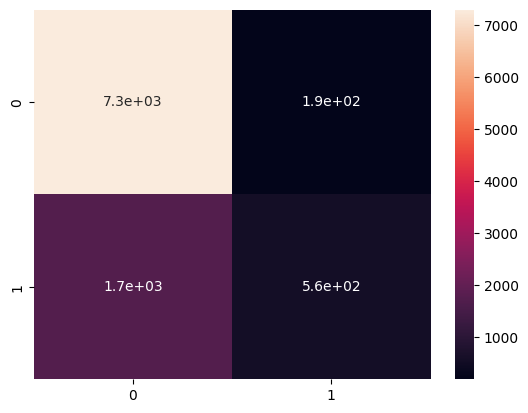

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.heatmap(cm, annot = True)

In [21]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7479
           1       0.75      0.25      0.37      2290

    accuracy                           0.80      9769
   macro avg       0.78      0.61      0.63      9769
weighted avg       0.79      0.80      0.76      9769

